## Packages

In [0]:
!pip install pmdarima 
!pip install arch
!pip install yfinance

In [0]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Loading the data

In [0]:
raw_data = yfinance.download (tickers = "WMT", start = "2015-01-02", 
                              end = "2020-05-08", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  1 of 1 completed


In [0]:
df_comp = raw_data.copy()

In [0]:
df_comp=df_comp.asfreq('d')
df_comp=df_comp.fillna(method='ffill')

In [0]:
Apple_df = df_comp

## Creating Returns

In [0]:
Apple_df['return'] = df_comp.Close.pct_change(1).mul(100)

In [0]:
Apple_df = Apple_df.drop(columns='Volume')

##Walmart dataset


In [0]:
Apple_df.tail()

,Open,High,Low,Close,return
Date,,,,,
2020-05-03,120.947972,123.148292,120.251033,122.381660,0.000000
2020-05-04,123.297628,123.855180,121.176959,123.158241,0.634557
2020-05-05,123.257811,124.711416,122.720175,124.183739,0.832667
2020-05-06,124.661633,124.940406,122.311968,122.760002,-1.146476
2020-05-07,123.459999,123.980003,121.500000,121.889999,-0.708702


In [0]:
Apple_df.summa

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6521 entries, 2000-01-03 to 2017-11-09
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6521 non-null   float64
 1   High    6521 non-null   float64
 2   Low     6521 non-null   float64
 3   Close   6521 non-null   float64
 4   return  6520 non-null   float64
dtypes: float64(5)
memory usage: 305.7 KB


In [0]:
S_P5

##S&P500 dataset

In [0]:
df_comp.tail()

,Open,High,Low,Close,return
Date,,,,,
2020-05-11,2915.459961,2944.250000,2903.439941,2930.189941,0.013308
2020-05-12,2939.500000,2945.820068,2869.590088,2870.120117,-2.050032
2020-05-13,2865.860107,2874.139893,2793.149902,2820.000000,-1.746272
2020-05-14,2794.540039,2852.800049,2766.639893,2852.500000,1.152482
2020-05-15,2829.949951,2865.010010,2816.780029,2863.699951,0.392636


In [0]:
df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp.ret_spx[1])*100

## Splitting the Data

In [0]:
size = int(len(df_comp)*0.8)
df_train, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [0]:
df_train.shape

(5288, 5)

## Fitting a Model

In [0]:
model_ar = ARIMA(df_train.Close, order = (1,0,0))
results_ar = model_ar.fit()

In [0]:
model_ar_510 = ARIMA(df_train.Close, order = (5,0,0))
results_ar_510 = model_ar_510.fit()

## Simple Forecasting

In [0]:
df_train.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-09,2081.290039,2093.310059,2074.290039,2091.179932,3.172360e+09
2015-04-10,2091.510010,2102.610107,2091.510010,2102.060059,3.156200e+09
2015-04-13,2102.030029,2107.649902,2092.330078,2092.429932,2.908420e+09
2015-04-14,2092.280029,2098.620117,2083.239990,2095.840088,3.301270e+09
2015-04-15,2097.820068,2111.909912,2097.820068,2106.629883,4.013760e+09


In [0]:
df_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-16,2105.959961,2111.300049,2100.020020,2104.989990,3.434120e+09
2015-04-17,2102.580078,2102.580078,2072.370117,2081.179932,3.627600e+09
2015-04-20,2084.110107,2103.939941,2084.110107,2100.399902,3.000160e+09
2015-04-21,2102.820068,2109.639893,2094.379883,2097.290039,3.243410e+09
2015-04-22,2098.270020,2109.979980,2091.050049,2107.959961,3.348480e+09


In [0]:
df_test.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-05,2868.879883,2898.229980,2863.550049,2868.439941,5.129590e+09
2020-05-06,2883.139893,2891.110107,2847.649902,2848.419922,4.861920e+09
2020-05-07,2878.260010,2901.919922,2876.479980,2881.189941,5.164640e+09
2020-05-08,2908.830078,2932.159912,2902.879883,2929.800049,4.857160e+09
2020-05-11,2915.459961,2944.250000,2903.439941,2930.189941,4.807320e+09


In [0]:
# create variables that will help us change the periods easily instead of typing them up every time
# make sure the start and end dates are business days, otherwise the code will result in an error
start_date = "2015-04-16"
end_date = "2020-05-11"

In [0]:
end_date = "2020-05-11"
df_pred = results_ar.predict(start = start_date, end = end_date)

In [0]:
end_date = "2020-05-11"
df_pred_510 = results_ar_510.predict(start = start_date, end = end_date)

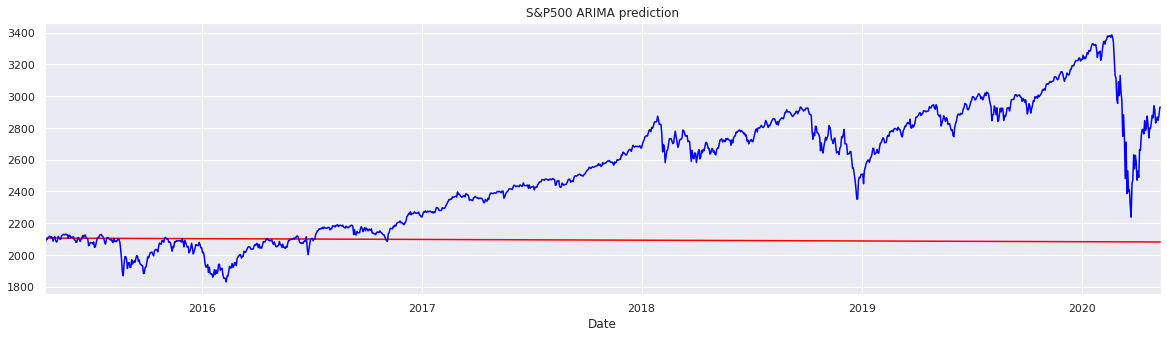

In [0]:
df_pred_510[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.Close[start_date:end_date].plot(color = "blue")
plt.title("S&P500 ARIMA prediction", size = 12)
plt.show()

In [0]:
df_test.shape

(1323, 5)

In [0]:
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse

In [0]:
print("RMSE %.4f" % rmse(df_test.Close,df_pred))

RMSE 696.3472


In [0]:
print("MSE %.4f" %)

In [0]:
print("MSE %4f" % mse(df_test.Close,df_pred_510))

MSE 379119.209044
